Prueba t para coeficientes: H₀: β₁ = 0 (variable no contribuye al modelo)

In [2]:
import pandas as pd
import statsmodels.formula.api as smf

# Crear DataFrame de ejemplo
df = pd.DataFrame({
    'ventas': [200, 250, 300, 280, 320],
    'gasto_publicidad': [20, 25, 30, 28, 35]
})

# Ajustar el modelo
modelo = smf.ols('ventas ~ gasto_publicidad', data=df).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     77.89
Date:                Wed, 07 Jan 2026   Prob (F-statistic):            0.00307
Time:                        12:41:55   Log-Likelihood:                -17.541
No. Observations:                   5   AIC:                             39.08
Df Residuals:                       3   BIC:                             38.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           42.9393     26.147  

c:\Users\cigle\Desktop\mi-primer-repo\analisis_datos_env\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Diagnóstico Visual

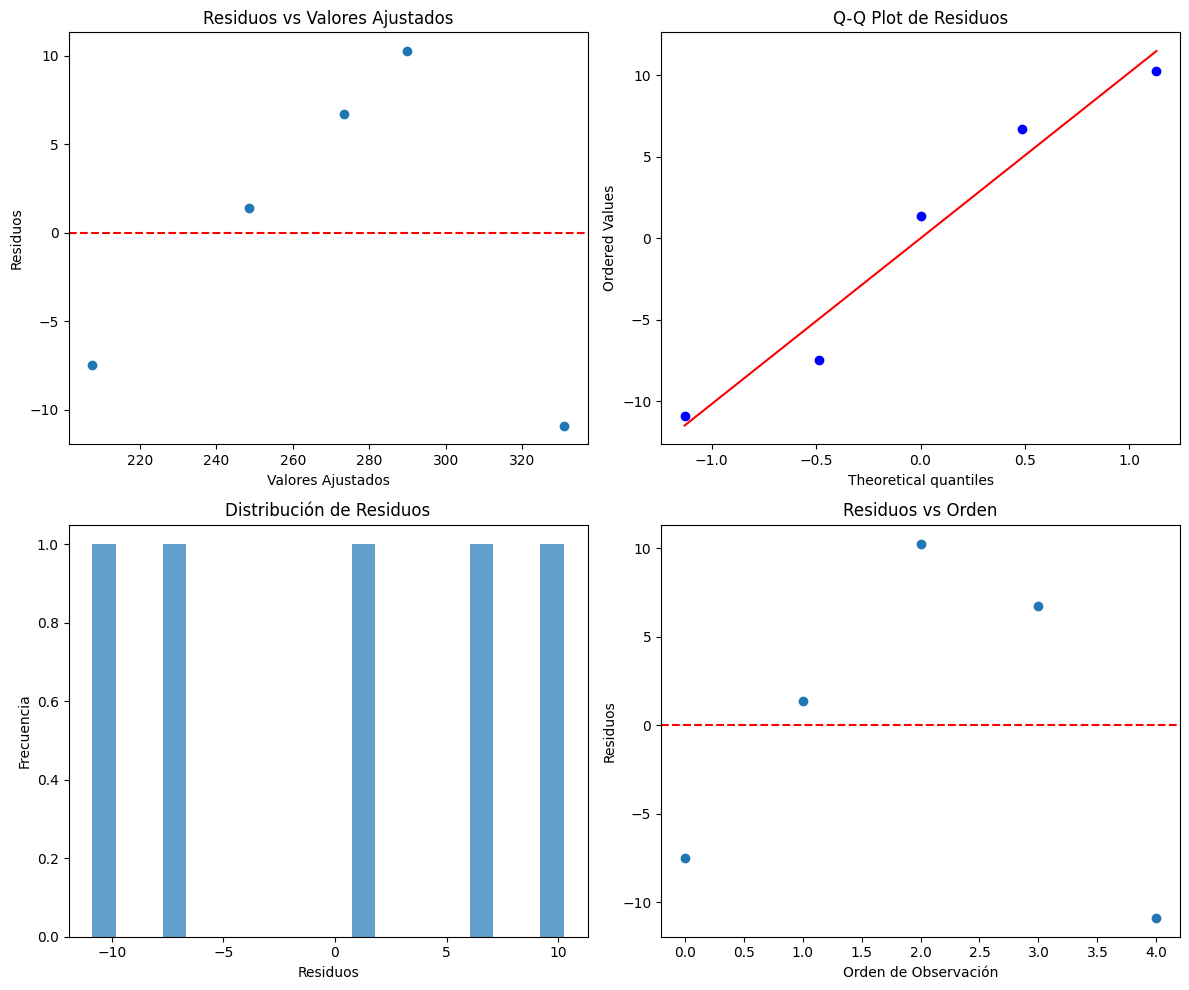

In [3]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Crear gráficos de diagnóstico
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# 1. Residuos vs Valores ajustados (linealidad + homocedasticidad)
ax1.scatter(modelo.fittedvalues, modelo.resid)
ax1.axhline(y=0, color='red', linestyle='--')
ax1.set_xlabel('Valores Ajustados')
ax1.set_ylabel('Residuos')
ax1.set_title('Residuos vs Valores Ajustados')

# 2. Q-Q plot (normalidad)
stats.probplot(modelo.resid, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot de Residuos')

# 3. Histograma de residuos (normalidad)
ax3.hist(modelo.resid, bins=20, alpha=0.7)
ax3.set_xlabel('Residuos')
ax3.set_ylabel('Frecuencia')
ax3.set_title('Distribución de Residuos')

# 4. Residuos vs Orden (independencia)
ax4.scatter(range(len(modelo.resid)), modelo.resid)
ax4.axhline(y=0, color='red', linestyle='--')
ax4.set_xlabel('Orden de Observación')
ax4.set_ylabel('Residuos')
ax4.set_title('Residuos vs Orden')

plt.tight_layout()
plt.show()